In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    acc = accuracy_score(labels, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(
        labels, predictions, average="binary"
    )
    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall
    }


In [ ]:
results = trainer.evaluate()
print("Evaluation Results:", results)

Evaluation Results: {'eval_loss': 0.15105511248111725, 'eval_accuracy': 0.973, 'eval_f1': 0.975653742110009, 'eval_precision': 0.9818511796733213, 'eval_recall': 0.9695340501792115, 'eval_runtime': 1.1424, 'eval_samples_per_second': 875.332, 'eval_steps_per_second': 109.416, 'epoch': 5.0}


In [ ]:
# Get predictions from the trainer
predictions_output = trainer.predict(tokenized_dataset["test"])

# Extract predicted labels
predicted_labels = predictions_output.predictions.argmax(axis=1)

# Extract true labels
true_labels = predictions_output.label_ids


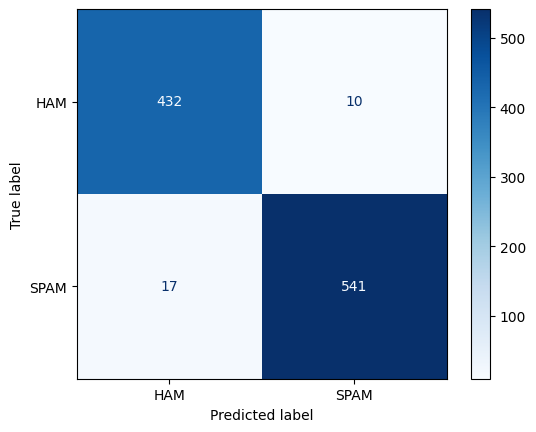

✅ Confusion matrix saved to reports/confusion_matrix.png


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os


# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["HAM", "SPAM"])
disp.plot(cmap=plt.cm.Blues)

# Save the figure
plt.savefig("Confusion_Matrix.png")
plt.show()

print("✅ Confusion matrix saved to reports/confusion_matrix.png")


In [ ]:
import torch
import pickle

# Save model weights
torch.save(model.state_dict(), "spam_model_weights.pth")

# Save tokenizer separately using pickle
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

print("✅ Model and tokenizer saved as spam_model_weights.pth and tokenizer.pkl")


✅ Model and tokenizer saved as spam_model_weights.pth and tokenizer.pkl
